In [106]:
import pydotplus 
import pandas as pd
from matplotlib import pyplot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import cross_val_score

In [11]:
data = pd.read_csv('german_credit.csv')

In [82]:
data_sample = data.sample(n = 50, random_state = 38)
targets = data_sample.iloc[:, :1]
features = data_sample.iloc[:, 1:]

In [83]:
model = tree.DecisionTreeClassifier()
model.fit(features, targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [84]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out",
                                feature_names=data.columns[1:],
                         filled=True, rounded=True,  
                         special_characters=True) 

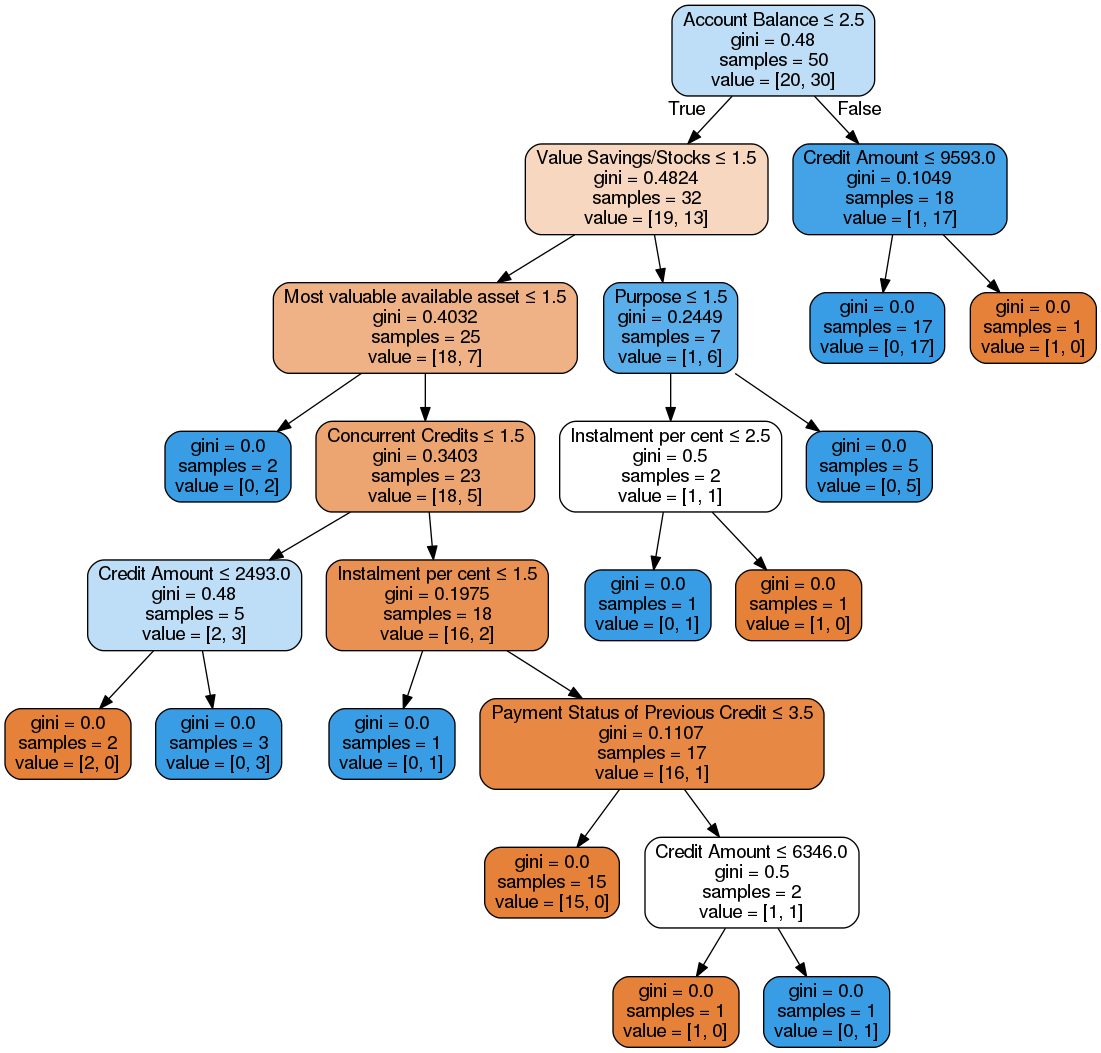

In [85]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

In [90]:
targets = data.iloc[:, :1]
features = data.iloc[:, 1:]
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(features, targets)
dot_data = tree.export_graphviz(model, out_file="small_tree.out",
                         filled=True, rounded=True,  
                         special_characters=True) 

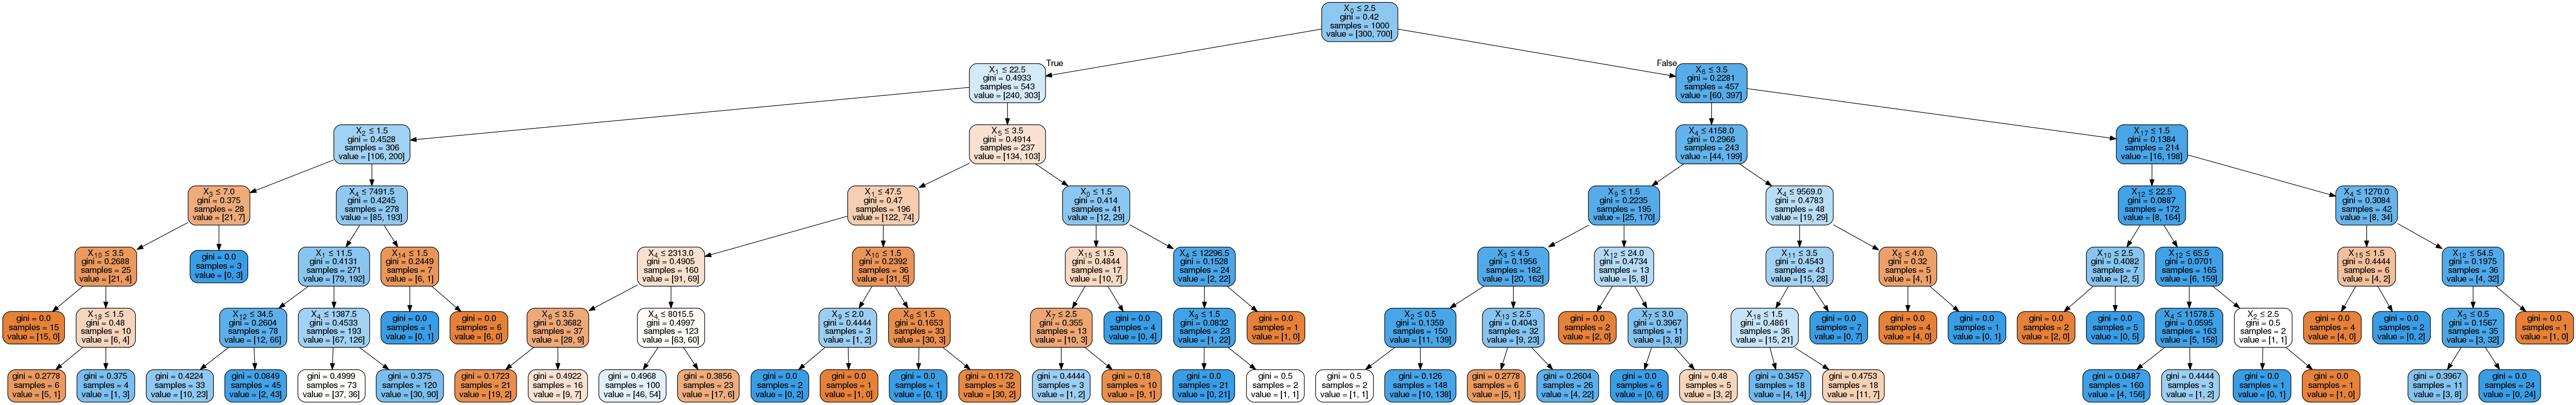

In [91]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

### Обучающая выборка

In [92]:
train_data, test_data, train_target, test_target = train_test_split(data.iloc[:, 1:], data.iloc[:, :1],
                                                                   test_size = 0.2)

In [102]:
train_score = []
for depth in range(1, 20):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(features, targets)
    train_predictions = model.predict(train_data)
    train_score.append(accuracy_score(train_target, train_predictions))

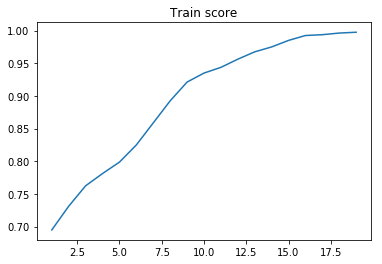

In [119]:
pyplot.plot(range(1, 20), train_score)
pyplot.title("Train score")
pyplot.show()

### Кросс-валидация

In [117]:
cross_score = []
for depth in range(1, 20):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    cross_score.append(np.mean(cross_val_score(model, data.iloc[:, 1:], data['Creditability'])))

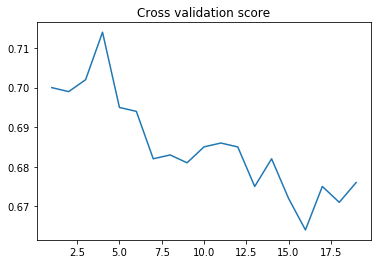

In [120]:
pyplot.plot(range(1, 20), cross_score)
pyplot.title("Cross validation score")
pyplot.show()

Видим сильное влияние переобучения на качество работы дерева.